In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [65]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [66]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [67]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace = True)

In [62]:
features = ['free', 'click', 'winner', 'money', 'buy', 'cash', 'offer', 'now', 'urgent', 'instant', 'bonus', 'no', 'instant', 
            'gift', 'purchase', 'believe', 'while', 'supplies', 'last', 'cost', 'fees', 'big', 'only', 'order', 
           'expires', 'win', 'award', 'receive', 'save', 'easy', 'prize']

In [68]:
df.columns=['label', 'text']

In [73]:
df['text']= df.text.str.lower()

In [70]:
for i in features:
    df[i] = df.text.str.contains(i)

In [71]:
df['label'] = df.label.apply(lambda x: 1 if x == 'spam' else 0)

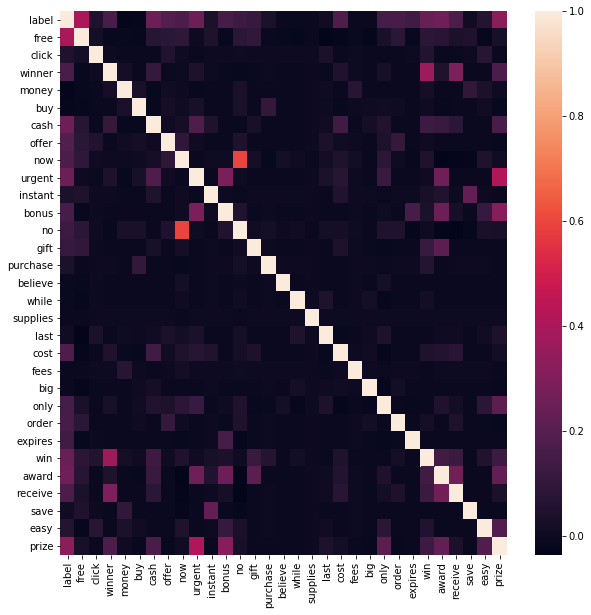

In [72]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr())

In [54]:
df.head(20)

,label,text,free,click,winner,money,buy,cash,offer,now,...,order,coupon,expires,win,award,receive,save,easy,vacation,prize
0,0,"go until jurong point, crazy.. available only ...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,ok lar... joking wif u oni...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,free entry in 2 a wkly comp to win fa cup fina...,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,0,u dun say so early hor... u c already then say...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,"nah i don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,freemsg hey there darling it's been 3 week's n...,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,0,even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,as per your request 'melle melle (oru minnamin...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,winner!! as a valued network customer you have...,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
9,1,had your mobile 11 months or more? u r entitle...,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
X = df[features]
y = df.label

In [75]:
from sklearn.cross_validation import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4179, 31), (4179,), (1393, 31), (1393,))

In [104]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.9260588657573582

In [105]:
y_pred = bnb.predict(X)

In [115]:
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 445


In [114]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1393, 5572]

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)